<a href="https://colab.research.google.com/github/FelipeAlvesG/Data-Science/blob/main/Data_Science_da_Atlas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Arquivo da dados que foi convertido para 'CSV' para testes futuros
#     pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Datasets/dados.csv')  

!pip install pandera

*Em formato de texto para não da erro toda vez que executar!*

In [1]:
#BIBLIOTECAS A SEREM USADAS
import pandas as pd
import numpy as np
#import pandera as pa
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [3]:
#Importando arquivo da dados em 'XLSX' conforme foi recebido, passando para uma váriavel e mostrando a quantidade de linhas e colunas 

df = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/Datasets/dados_assinaturas.xlsx')
df.shape
print(f"Dataset tem {df.shape[0]} linhas e {df.shape[1]} colunas.")

Dataset tem 2027 linhas e 14 colunas.


##**Arquitetura dos Dados (AD)**
######*Foi renomeado as colunas manualmente, claro que poderia ser renomeado por meio do código, mas para agilizar o relatório.*


* **id** : Número de identificação do cliente
* **data_criacao_perfil** : 'Nome sugestivo'
* **data_exclusao_perfil** : 'Nome sugestivo'
* **cod_plano** : 5 Tipos de planos(A,B,C,D,E)
* **forma_pagamento** : 'Nome sugestivo'
* **valor_plano** : 'Nome sugestivo'
* **status_plano** : 3 Status (Draft:'em andamento',Active e Canceled)
* **dia_pagamento** : 'Nome sugestivo'
* **ultimo_pagamento** : 'Data do ultima pagamento do plano'
* **proximo_pagamento** : 'Nome sugestivo'
* **data_cancel_plano** : Data e Hora do cancelamento do Plano
* **razao_cancelamento** : Motivo por que foi cancelado
* **data_perfil_criado** : 'Nome sugestivo'
* **uf_perfil** : Estado do Cadastro do Perfil


In [4]:
df.head()

,id,data_criacao_perfil,data_exclusao_perfil,cod_plano,forma_pagamento,valor_plano,status_plano,dia_pagamento,ultimo_pagamento,proximo_pagamento,data_cancel_plano,razao_cancelamento,data_perfil_criado,uf_perfil
0,473128,2021-07-16 12:45:36,NaT,plano D,CREDIT_CARD,59.9,DRAFT,19,NaN,NaT,NaT,NaN,2021-07-19 18:45:21,Rio de Janeiro
1,315949,2021-07-14 11:01:43,NaT,plano A,CREDIT_CARD,89.9,CANCELED,23,2021-07-23,2021-07-23,2021-07-23,PAYMENT FAILED,2021-07-23 20:05:14,Rio de Janeiro
2,293763,2018-12-21 04:34:25,NaT,plano B,CREDIT_CARD,359.9,CANCELED,24,2021-07-24,2021-07-24,2021-07-27,USER SUSPENDED,2021-07-24 21:34:55,Bahia
3,124763,2021-01-24 07:52:57,NaT,plano D,CREDIT_CARD,59.9,CANCELED,25,NaN,NaT,2021-07-04,ADMIN CANCELED,2021-07-25 01:04:58,Rio de Janeiro
4,391446,2021-01-24 07:52:57,NaT,plano A,CREDIT_CARD,99.9,CANCELED,25,NaN,NaT,2021-07-04,ADMIN CANCELED,2021-07-25 01:05:05,Rio de Janeiro


In [ ]:
df.data_criacao_perfil.dt.month.sort_values(ascending=False)

In [5]:
df.id.duplicated().sum()
df[df["id"].duplicated()]

,id,data_criacao_perfil,data_exclusao_perfil,cod_plano,forma_pagamento,valor_plano,status_plano,dia_pagamento,ultimo_pagamento,proximo_pagamento,data_cancel_plano,razao_cancelamento,data_perfil_criado,uf_perfil
412,326339,2020-09-16 09:20:11,2021-10-11 18:57:43,plano D,CREDIT_CARD,59.9,DRAFT,15,NaN,NaT,NaT,NaN,2021-07-15 11:26:40,São Paulo
901,27222,2021-05-03 09:56:44,NaT,plano A,CREDIT_CARD,99.9,CANCELED,8,NaN,NaT,2021-09-07,PAYMENT FAILED,2021-09-07 18:09:06,Minas Gerais
1198,180754,2019-05-01 23:13:43,2021-09-29 01:14:32,plano B,CREDIT_CARD,399.9,CANCELED,23,NaN,NaT,2021-09-23,PAYMENT FAILED,2021-09-23 19:41:20,Rio de Janeiro
1730,172197,2018-12-17 10:09:53,NaT,plano D,CREDIT_CARD,59.9,CANCELED,13,NaN,NaT,2021-10-13,PAYMENT FAILED,2021-10-13 20:17:07,Santa Catarina
1986,1299807,2021-10-26 10:58:27,NaT,plano B,CREDIT_CARD,399.9,CANCELED,27,NaN,NaT,2021-07-04,ADMIN CANCELED,2021-06-27 15:45:34,Minas Gerais


In [10]:
df.isna().sum()

id                         0
data_criacao_perfil        0
data_exclusao_perfil    1897
cod_plano                  0
forma_pagamento            0
valor_plano                0
status_plano               0
dia_pagamento              0
ultimo_pagamento         929
proximo_pagamento        929
data_cancel_plano        430
razao_cancelamento       424
data_perfil_criado         0
uf_perfil                  0
dtype: int64

In [5]:
df.isnull().sum()

id                         0
data_criacao_perfil        0
data_exclusao_perfil    1897
cod_plano                  0
forma_pagamento            0
valor_plano                0
status_plano               0
dia_pagamento              0
ultimo_pagamento         929
proximo_pagamento        929
data_cancel_plano        430
razao_cancelamento       424
data_perfil_criado         0
uf_perfil                  0
dtype: int64

In [21]:
df.loc[:,'valor_plano']

0        59.9
1        89.9
2       359.9
3        59.9
4        99.9
        ...  
2022     89.9
2023     53.9
2024     89.9
2025     53.9
2026     89.9
Name: valor_plano, Length: 2027, dtype: float64

In [ ]:
df.info()

In [8]:
df.duplicated().sum()

0

In [9]:
df.cod_plano.value_counts()

plano A    682
plano B    450
plano C    413
plano D    387
plano E     95
Name: cod_plano, dtype: int64

In [ ]:
df["cod_plano"].str.contains("plano A")

In [63]:
plano_a = df[df["cod_plano"].str.contains("plano A", na=False)]

In [29]:
tst = df.cod_plano.str[-1] == "A"
df.loc[tst]

,id,data_criacao_perfil,data_exclusao_perfil,cod_plano,forma_pagamento,valor_plano,status_plano,dia_pagamento,ultimo_pagamento,proximo_pagamento,data_cancel_plano,razao_cancelamento,data_perfil_criado,uf_perfil
1,315949,2021-07-14 11:01:43,NaT,plano A,CREDIT_CARD,89.9,CANCELED,23,2021-07-23,2021-07-23,2021-07-23,PAYMENT FAILED,2021-07-23 20:05:14,Rio de Janeiro
4,391446,2021-01-24 07:52:57,NaT,plano A,CREDIT_CARD,99.9,CANCELED,25,NaN,NaT,2021-07-04,ADMIN CANCELED,2021-07-25 01:05:05,Rio de Janeiro
5,322789,2020-05-11 16:16:23,NaT,plano A,CREDIT_CARD,89.9,ACTIVE,26,2021-09-26,2021-10-26,NaT,NaN,2021-07-26 10:21:55,Rio de Janeiro
12,257313,2021-03-27 16:21:12,NaT,plano A,CREDIT_CARD,99.9,CANCELED,27,NaN,NaT,2021-07-29,USER SUSPENDED,2021-07-27 07:04:34,Rio de Janeiro
16,316712,2021-01-22 09:34:21,NaT,plano A,CREDIT_CARD,99.9,CANCELED,27,NaN,NaT,2021-07-04,ADMIN CANCELED,2021-07-27 14:53:11,Mato Grosso
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2011,1299782,2021-10-26 10:30:23,NaT,plano A,CREDIT_CARD,89.9,CANCELED,28,2021-06-28 00:00:00,2021-07-28,2021-07-21,USER SUSPENDED,2021-06-28 18:51:52,Rio de Janeiro
2016,1299777,2021-10-26 10:27:15,NaT,plano A,CREDIT_CARD,99.9,CANCELED,29,NaN,NaT,2021-07-04,ADMIN CANCELED,2021-06-29 00:00:29,São Paulo
2022,1299771,2021-10-26 10:23:16,NaT,plano A,CREDIT_CARD,89.9,CANCELED,26,2021-06-29 00:00:00,2021-07-26,2021-07-21,USER SUSPENDED,2021-06-29 12:37:09,Minas Gerais
2024,1299769,2021-10-26 10:18:38,NaT,plano A,CREDIT_CARD,89.9,CANCELED,26,2021-06-26 00:00:00,2021-07-26,2021-07-12,USER CANCELED,2021-06-29 12:40:01,São Paulo


In [ ]:
plano_a

In [71]:
plano_a.groupby([plano_a['status_plano']])["cod_plano"].value_counts()

status_plano   cod_plano
ACTIVE         plano A      136
CANCEL QUEUED  plano A        1
CANCELED       plano A      532
DRAFT          plano A       13
Name: cod_plano, dtype: int64

In [37]:
df.groupby([df['status_plano']])["cod_plano"].value_counts()

status_plano   cod_plano
ACTIVE         plano A      136
               plano B       78
               plano D       74
               plano C       71
               plano E       11
CANCEL QUEUED  plano D        3
               plano A        1
               plano B        1
               plano C        1
CANCELED       plano A      532
               plano B      362
               plano C      326
               plano D      298
               plano E       79
DRAFT          plano C       15
               plano A       13
               plano D       12
               plano B        9
               plano E        5
Name: cod_plano, dtype: int64

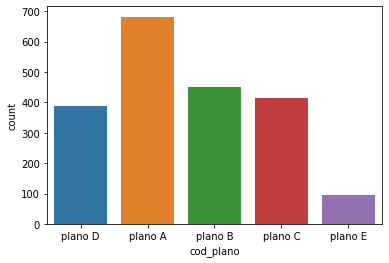

In [8]:
sns.countplot(df['cod_plano'])

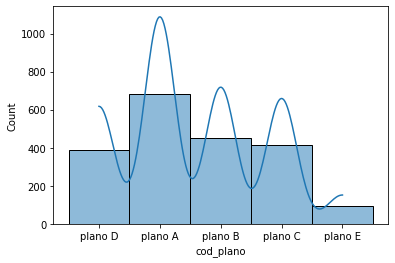

In [14]:
sns.histplot(df['cod_plano'], kde=True)

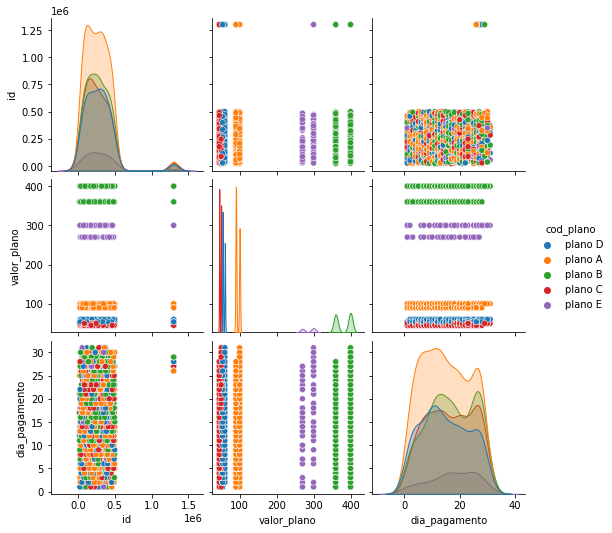

In [6]:
sns.pairplot(df, hue='cod_plano')

In [ ]:
#antes de dropa os nulos é necessarios trata-los
df = df.dropna()

In [ ]:
status_plano_qtds = df[df['cod_plano'] == 'plano A']['status_plano'].value_counts()
status_plano_qtds